<a href="https://colab.research.google.com/github/skywalker0803r/Wastewater-Biological-Treatment/blob/main/%E6%AF%8F%E4%B8%80%E7%A8%AE%E8%9F%B2%E6%A0%B9%E6%93%9A%E8%87%AA%E5%B7%B1%E7%9A%84%E7%99%BE%E5%88%86%E4%BD%8D%E6%95%B8%E5%81%9A%E5%88%87%E5%88%86%E5%88%86%E6%88%9010%E9%A1%9E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
from tqdm import tqdm_notebook as tqdm
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

df = pd.read_csv('/content/drive/MyDrive/廢水案子/ALLdataset.csv',index_col = 0)
df = df.dropna(axis=0)
d = pd.DataFrame()
# 對各 日期&各蟲 做採樣100筆
for i in tqdm(df.index.unique()):
  for cName in df.cName.unique():
    try:
      d = d.append(df.loc[(df.index==i)&(df.cName==cName)].sample(100))
    except:
      d = d.append(df.loc[(df.index==i)&(df.cName==cName)])
df = d
df

  0%|          | 0/279 [00:00<?, ?it/s]

,site,cindex,cName,classification,confidence,D
date,,,,,,
20210927,T752,101,輪蟲幼蟲,101_輪蟲幼蟲,0.486628,32.592809
20210927,T752,101,輪蟲幼蟲,101_輪蟲幼蟲,0.834668,36.981352
20210927,T752,101,輪蟲幼蟲,101_輪蟲幼蟲,0.897461,35.098697
20210927,T753,101,輪蟲幼蟲,101_輪蟲幼蟲,0.436860,38.498297
20210927,T753,101,輪蟲幼蟲,101_輪蟲幼蟲,0.415142,38.055136
...,...,...,...,...,...,...
20230216,T752,109,表殼蟲,109_表殼蟲,0.877870,94.199948
20230216,T753,109,表殼蟲,109_表殼蟲,0.992564,34.427765
20230216,T753,109,表殼蟲,109_表殼蟲,0.870810,62.918026


In [3]:
def convert_to_df2(df):
    new_df = pd.DataFrame(index = df.index.unique())
    
    for i in df.cName.unique():
        for j in range(1,11,1):
            new_df[i+str(int(j*10))+'%'] = np.nan
    
    for date in tqdm(new_df.index):#日期循環
        for cName in df['cName'].unique():#蟲類循環
            for q in range(1,11,1):#百分位數循環
                q = q*0.1
                d = df.loc[(df.index==date)&(df.cName==cName),['D']]
                d2 = d.loc[(d['D']>d['D'].quantile(q-0.1))&(d['D']<d['D'].quantile(q))]
                new_df.loc[date,cName+str(int(q*100))+'%'] = len(d2)
    
    return new_df
df2 = convert_to_df2(df)
df2

  0%|          | 0/279 [00:00<?, ?it/s]

,輪蟲幼蟲10%,輪蟲幼蟲20%,輪蟲幼蟲30%,輪蟲幼蟲40%,輪蟲幼蟲50%,輪蟲幼蟲60%,輪蟲幼蟲70%,輪蟲幼蟲80%,輪蟲幼蟲90%,輪蟲幼蟲100%,...,未定義10%,未定義20%,未定義30%,未定義40%,未定義50%,未定義60%,未定義70%,未定義80%,未定義90%,未定義100%
date,,,,,,,,,,,,,,,,,,,,,
20210927,9.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20210928,9.0,10.0,10.0,10.0,10.0,9.0,9.0,10.0,10.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20210929,9.0,9.0,9.0,10.0,10.0,9.0,9.0,10.0,10.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20210930,9.0,10.0,9.0,9.0,10.0,10.0,10.0,10.0,10.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20211004,9.0,8.0,9.0,10.0,10.0,10.0,10.0,10.0,10.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20230210,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20230213,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20230214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
lst = []
for item in df2.columns.tolist():
    if '絲狀菌' in item or '未定義' in item:
      pass
    else:
      lst.append(item)

print(lst)

['輪蟲幼蟲10%', '輪蟲幼蟲20%', '輪蟲幼蟲30%', '輪蟲幼蟲40%', '輪蟲幼蟲50%', '輪蟲幼蟲60%', '輪蟲幼蟲70%', '輪蟲幼蟲80%', '輪蟲幼蟲90%', '輪蟲幼蟲100%', '膜袋蟲10%', '膜袋蟲20%', '膜袋蟲30%', '膜袋蟲40%', '膜袋蟲50%', '膜袋蟲60%', '膜袋蟲70%', '膜袋蟲80%', '膜袋蟲90%', '膜袋蟲100%', '斜管蟲10%', '斜管蟲20%', '斜管蟲30%', '斜管蟲40%', '斜管蟲50%', '斜管蟲60%', '斜管蟲70%', '斜管蟲80%', '斜管蟲90%', '斜管蟲100%', '尾絲蟲10%', '尾絲蟲20%', '尾絲蟲30%', '尾絲蟲40%', '尾絲蟲50%', '尾絲蟲60%', '尾絲蟲70%', '尾絲蟲80%', '尾絲蟲90%', '尾絲蟲100%', '漫遊蟲10%', '漫遊蟲20%', '漫遊蟲30%', '漫遊蟲40%', '漫遊蟲50%', '漫遊蟲60%', '漫遊蟲70%', '漫遊蟲80%', '漫遊蟲90%', '漫遊蟲100%', '螺旋菌10%', '螺旋菌20%', '螺旋菌30%', '螺旋菌40%', '螺旋菌50%', '螺旋菌60%', '螺旋菌70%', '螺旋菌80%', '螺旋菌90%', '螺旋菌100%', '變形蟲10%', '變形蟲20%', '變形蟲30%', '變形蟲40%', '變形蟲50%', '變形蟲60%', '變形蟲70%', '變形蟲80%', '變形蟲90%', '變形蟲100%', '滴蟲10%', '滴蟲20%', '滴蟲30%', '滴蟲40%', '滴蟲50%', '滴蟲60%', '滴蟲70%', '滴蟲80%', '滴蟲90%', '滴蟲100%', '變形蟲210%', '變形蟲220%', '變形蟲230%', '變形蟲240%', '變形蟲250%', '變形蟲260%', '變形蟲270%', '變形蟲280%', '變形蟲290%', '變形蟲2100%', '腔輪蟲10%', '腔輪蟲20%', '腔輪蟲30%', '腔輪蟲40%', '腔輪蟲50%', '腔輪蟲60%', '腔輪蟲70%', '腔輪蟲80%', 

In [11]:
df2 = df2.loc[:,lst]
df2

,輪蟲幼蟲10%,輪蟲幼蟲20%,輪蟲幼蟲30%,輪蟲幼蟲40%,輪蟲幼蟲50%,輪蟲幼蟲60%,輪蟲幼蟲70%,輪蟲幼蟲80%,輪蟲幼蟲90%,輪蟲幼蟲100%,...,表殼蟲10%,表殼蟲20%,表殼蟲30%,表殼蟲40%,表殼蟲50%,表殼蟲60%,表殼蟲70%,表殼蟲80%,表殼蟲90%,表殼蟲100%
date,,,,,,,,,,,,,,,,,,,,,
20210927,9.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20210928,9.0,10.0,10.0,10.0,10.0,9.0,9.0,10.0,10.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20210929,9.0,9.0,9.0,10.0,10.0,9.0,9.0,10.0,10.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20210930,9.0,10.0,9.0,9.0,10.0,10.0,10.0,10.0,10.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20211004,9.0,8.0,9.0,10.0,10.0,10.0,10.0,10.0,10.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20230210,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
20230213,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20230214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
df2.describe().std().sort_values().tail(20)

輪蟲類70%      98.393052
輪蟲類40%      98.393052
輪蟲類30%      98.440657
輪蟲類80%      98.440657
輪蟲類20%      98.443489
輪蟲類90%      98.443489
變形蟲270%     98.447347
變形蟲240%     98.447347
輪蟲類60%      98.449178
變形蟲230%     98.449477
變形蟲280%     98.450212
變形蟲290%     98.452190
變形蟲220%     98.452190
輪蟲類50%      98.503122
變形蟲260%     98.510480
變形蟲250%     98.514775
輪蟲類100%     98.515018
輪蟲類10%      98.515018
變形蟲2100%    98.524757
變形蟲210%     98.524757
dtype: float64

X 輪蟲類10% Y膜袋蟲100%


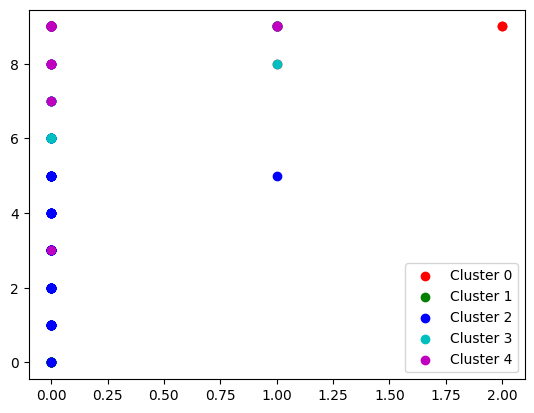

In [21]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans,DBSCAN
import matplotlib.pyplot as plt

# 確定要分成的群組數量
k = 5

# 使用K-Means進行分群
kmeans = KMeans(n_clusters=k).fit(df2)

# 將分群的結果加入DataFrame中
df2['cluster'] = kmeans.labels_

# 繪製分群的結果
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
for i in range(k):
    cluster_data = df2[df2['cluster'] == i]
    plt.scatter(cluster_data['輪蟲類10%'], cluster_data['膜袋蟲100%'], c=colors[i], label=f'Cluster {i}')
print('X 輪蟲類10% Y膜袋蟲100%')
plt.legend()
plt.show()